# Homework 4: Data Visualization
- **Name**:  Sai Rohith Yadav Kalasani
- **UB Username**: skalasan
- **UB Person Number**:  50546250

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

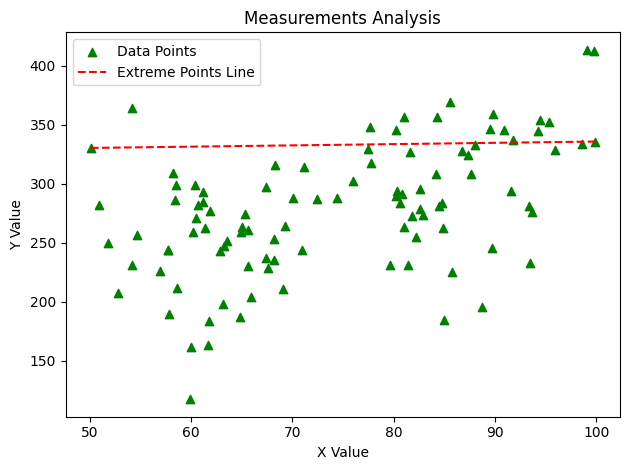

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file, assuming it has no header row.
# If the CSV has a header, remove the 'names' parameter.
dataFrame = pd.read_csv('C:/Users/rohith/OneDrive/Documents/VD/SUNY_B/Fall_2023/IE_555_CM_PFA/code/scatter_data.csv', comment='%', names=['xValue', 'yValue'])

# Extract the x and y variables for easier reference.
xValues = dataFrame['xValue']
yValues = dataFrame['yValue']

# Create a scatter plot of the observations.
plt.scatter(xValues, yValues, color='green', marker='^', label='Data Points')

# Find the indices of the minimum and maximum values of the x variable.
indexMinX = xValues.idxmin()
indexMaxX = xValues.idxmax()

# Use the indices to find the corresponding y values.
leftmostY = yValues[indexMinX]
rightmostY = yValues[indexMaxX]

# Plot a line between the points with the smallest and largest x values.
plt.plot([xValues[indexMinX], xValues[indexMaxX]], [leftmostY, rightmostY], 'r--', label='Extreme Points Line')

# Add a title and labels to the axes.
plt.title('Measurements Analysis')
plt.xlabel('X Value')
plt.ylabel('Y Value')

# Display the legend.
plt.legend()

# Ensure the plot displays correctly with tight layout.
plt.tight_layout()

# Display the plot.
plt.show()


### Problem 2 - Histogram

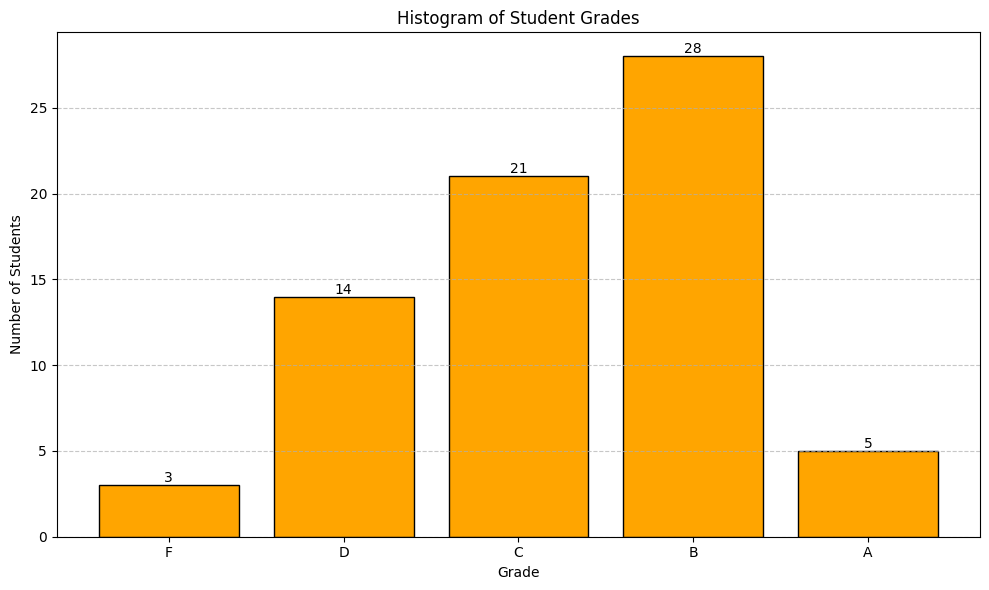

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file without a header row and assign column names
gradesDf = pd.read_csv('C:/Users/rohith/OneDrive/Documents/VD/SUNY_B/Fall_2023/IE_555_CM_PFA/code/student_grades.csv',comment='%',names=['studentID','avgScore'])

# Define the bins and labels for the histogram
gradeBins = [0, 60, 70, 80, 90, 100]
gradeLabels = ['F', 'D', 'C', 'B', 'A']

# Categorize 'avgScore' into letter grades
gradesDf['letterGrade'] = pd.cut(gradesDf['avgScore'], bins=gradeBins, labels=gradeLabels, right=False, include_lowest=True)

# Count the number of students in each grade
gradeCount = gradesDf['letterGrade'].value_counts().reindex(gradeLabels, fill_value=0)

# Plot setup
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(gradeCount.index, gradeCount.values, color='orange', edgecolor='black')

# Adding counts above bars
for i, count in enumerate(gradeCount.values):
    plt.text(i, count, str(count), fontsize=10, color='black', ha='center', va='bottom')

# Setting x-axis ticks to align with bars
plt.xticks(range(len(gradeLabels)), gradeLabels)

# Axis labels and plot title
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Histogram of Student Grades')

# Adding a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust plot layout
plt.tight_layout()
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

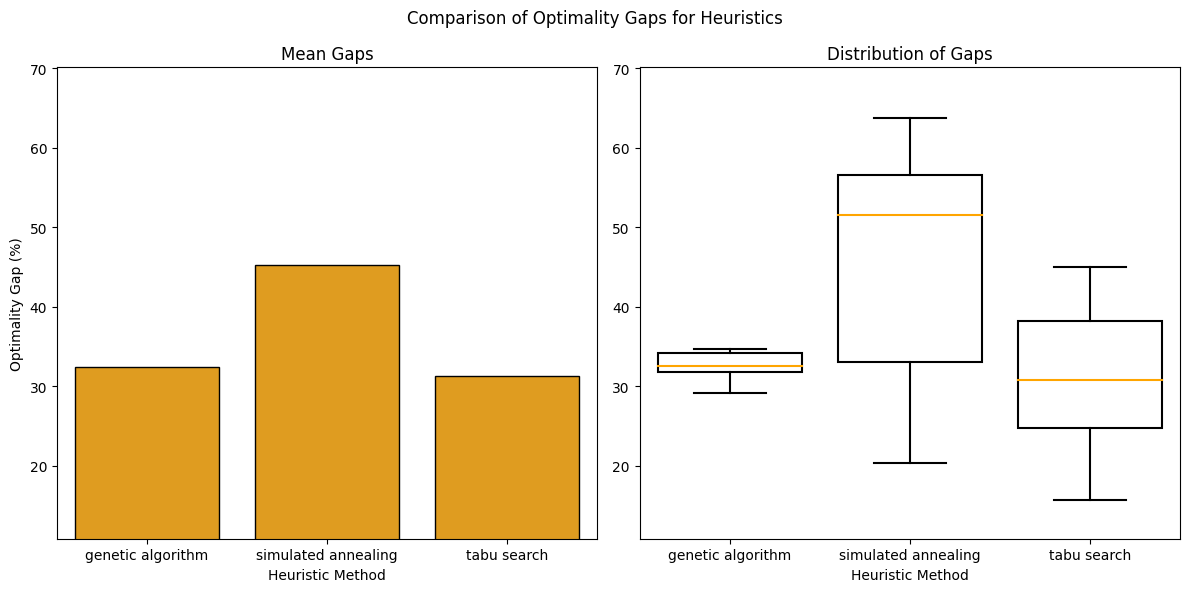

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

# Read data from CSV, skipping the first row and setting new column names
column_names = ['problemId', 'solutionMethod', 'objectiveFunctionValue']
data = pd.read_csv('C:/Users/rohith/OneDrive/Documents/VD/SUNY_B/Fall_2023/IE_555_CM_PFA/code/solution_data.csv', skiprows=1, names=column_names)

# Calculate the optimality gaps. Assuming that for each problem the optimal value is the max value for that problem.
optimal_values = data[data['solutionMethod'] == 'optimal'].set_index('problemId')['objectiveFunctionValue']
data['optimalityGap'] = data.apply(lambda row: 0 if row['solutionMethod'] == 'optimal' else (optimal_values[row['problemId']] - row['objectiveFunctionValue']) / optimal_values[row['problemId']] * 100, axis=1)

# Filter out the optimal rows for plotting
plot_data = data[data['solutionMethod'] != 'optimal']

# Create the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for the mean optimality gaps
sns.barplot(ax=ax[0], x='solutionMethod', y='optimalityGap', data=plot_data,
            color='orange', edgecolor='black', errorbar=None)
ax[0].set_title('Mean Gaps')
ax[0].set_xlabel('Heuristic Method')
ax[0].set_ylabel('Optimality Gap (%)')


# Boxplot for the distribution of optimality gaps
sns.boxplot(ax=ax[1], x='solutionMethod', y='optimalityGap', data=plot_data, 
            medianprops={'color': 'orange'}, boxprops={'facecolor': 'white', 'edgecolor': 'black'},
            whiskerprops={'color': 'black'}, capprops={'color': 'black'})
ax[1].set_title('Distribution of Gaps')
ax[1].set_xlabel('Heuristic Method')
ax[1].set_ylabel('')

# Color the median line orange
for artist in ax[1].artists:
    for line in artist.lines:
        line.set_color('orange')

# Set the same y-axis scale for both subplots
all_gaps = plot_data['optimalityGap']
y_min, y_max = all_gaps.min(), all_gaps.max()
ax[0].set_ylim([y_min - (y_max - y_min) * 0.1, y_max * 1.1])  # add 10% headroom and footroom
ax[1].set_ylim([y_min - (y_max - y_min) * 0.1, y_max * 1.1])

# Set overall title
plt.suptitle('Comparison of Optimality Gaps for Heuristics')

# Show the plot
plt.tight_layout()
plt.show()


--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
- **URL of Sample Data**:  https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv

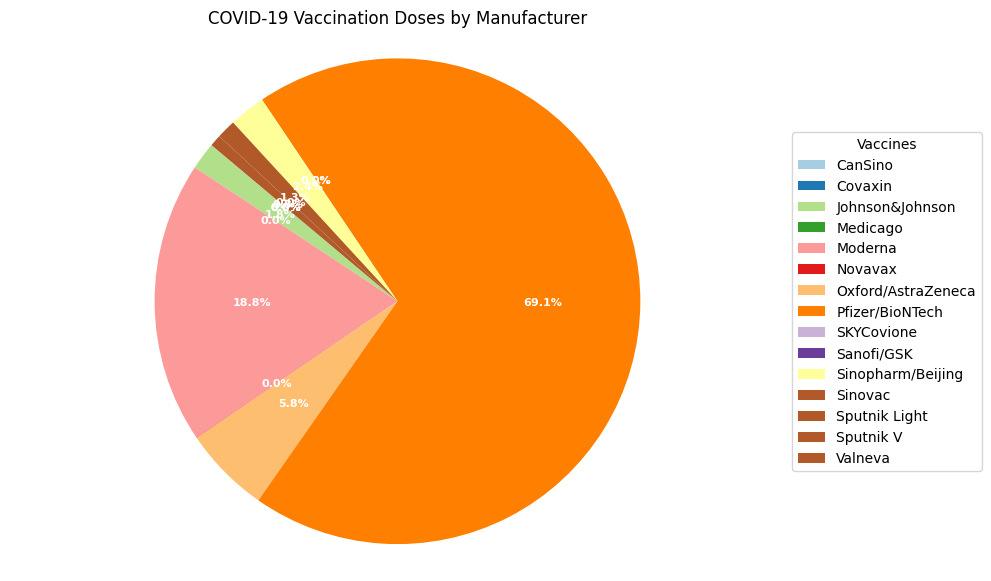

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from the given CSV file path
vaccinationData = pd.read_csv('C:/Users/rohith/OneDrive/Documents/VD/SUNY_B/Fall_2023/IE_555_CM_PFA/code/vaccinations-by-manufacturer.csv')

# Assuming the CSV has columns 'vaccine' and 'total_vaccinations'
# Group the data by 'vaccine' and sum the 'total_vaccinations'
vaccineDoses = vaccinationData.groupby('vaccine')['total_vaccinations'].sum()

# Define colors for each slice using the matplotlib colormap
colors = plt.cm.Paired(range(len(vaccineDoses)))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
wedges, texts, autoTexts = plt.pie(vaccineDoses, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':"w"})

# Legend
plt.legend(wedges, vaccineDoses.index, title="Vaccines", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Improve the display of the percentage texts inside the pie slices
plt.setp(autoTexts, size=8, weight="bold")

# Set the title and make the plot look circular
plt.title('COVID-19 Vaccination Doses by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Display the plot
plt.show()


[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 